# Линейные алгоритмы. Переобучение и недообучение.

# Recap

## Задачи машинного обучения:

- С учителем: есть целевая переменная
- Без учителя: нет целевой переменной

## Задачи обучения с учителем:

- Регрессия: $ y \in \mathbb {R}$
- Классификация: $ y \in \mathbb {N}$

## Метрики качества регрессии


$$ MSE = \frac {1}{n} \sum{(\hat{y_i}- y_i)^2}$$
$$ RMSE = \frac {1}{n} \sqrt{\sum{\hat{y_i}- y_i)^2}}$$
$$ MAE = \frac {1}{n} \sum{|\hat{y_i}- y_i|}$$
$$ MAPE = \frac {1}{n} \sum |{\frac{\hat{y_i}- y_i}{y_i}}|$$
$$R^2 = 1- \frac{\sum{(\hat{y_i}- y_i)^2}}{\sum{(y_i - \overline{y})^2}}$$


## Метрики классификации

$$ Accuracy = \frac{TP + TN}{TP + TN + FP + FN} $$

$$ Recall = \frac{TP}{TP + FN}$$

$$ Precision = \frac{TP}{TP + FP}$$

$$ F1 = \frac{2PR}{R + P}$$

$$ROC-AUC-кривая $$
$FPR = \frac{FP}{FP + TN}$
$TPR = \frac{TP}{TP + FN}$


## Хвост с прошлого урока: ROC-кривая


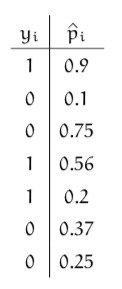

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
y = [1, 0, 0, 1, 1, 0, 0]
y_proba = [0.9, 0.1, 0.75, 0.56, 0.2, 0.37, 0.25]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_proba)
roc_auc_test = roc_auc_score(y, y_proba)

plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.DataFrame([y, y_proba], index=['y', 'y_proba']).T.sort_values(by='y_proba', ascending=False)
data

# Немножко теории перед моделированием

**Модель - не гадалка**

**Узнать, на сколько ошибаются модели, после их продуктивизации - дорогое удовольствие**

## Отложенная выборка

Данные разделяют на две части: обучающую (train) и тестовую (test)

На тренировочной части обучаются и валидируется модель. 
На тестовой части проверяется качество **_уже обученной_** модели

Соотношения: 80/20, 70/30, 67.(6) / 33.(3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(data, test_size=0.2)

# если X и y хранятся в отдельных переменных, можно так

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Много отложенных выборок

Данные разделяют на две части: обучающую (train) и тестовую (test)

Так делают **несколько раз**

## Кросс-валидация

<img src='https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'>

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# cross_val =  cross_val_score(estimator, X, y, scoring=None, cv=5)

# Линейные алгоритмы

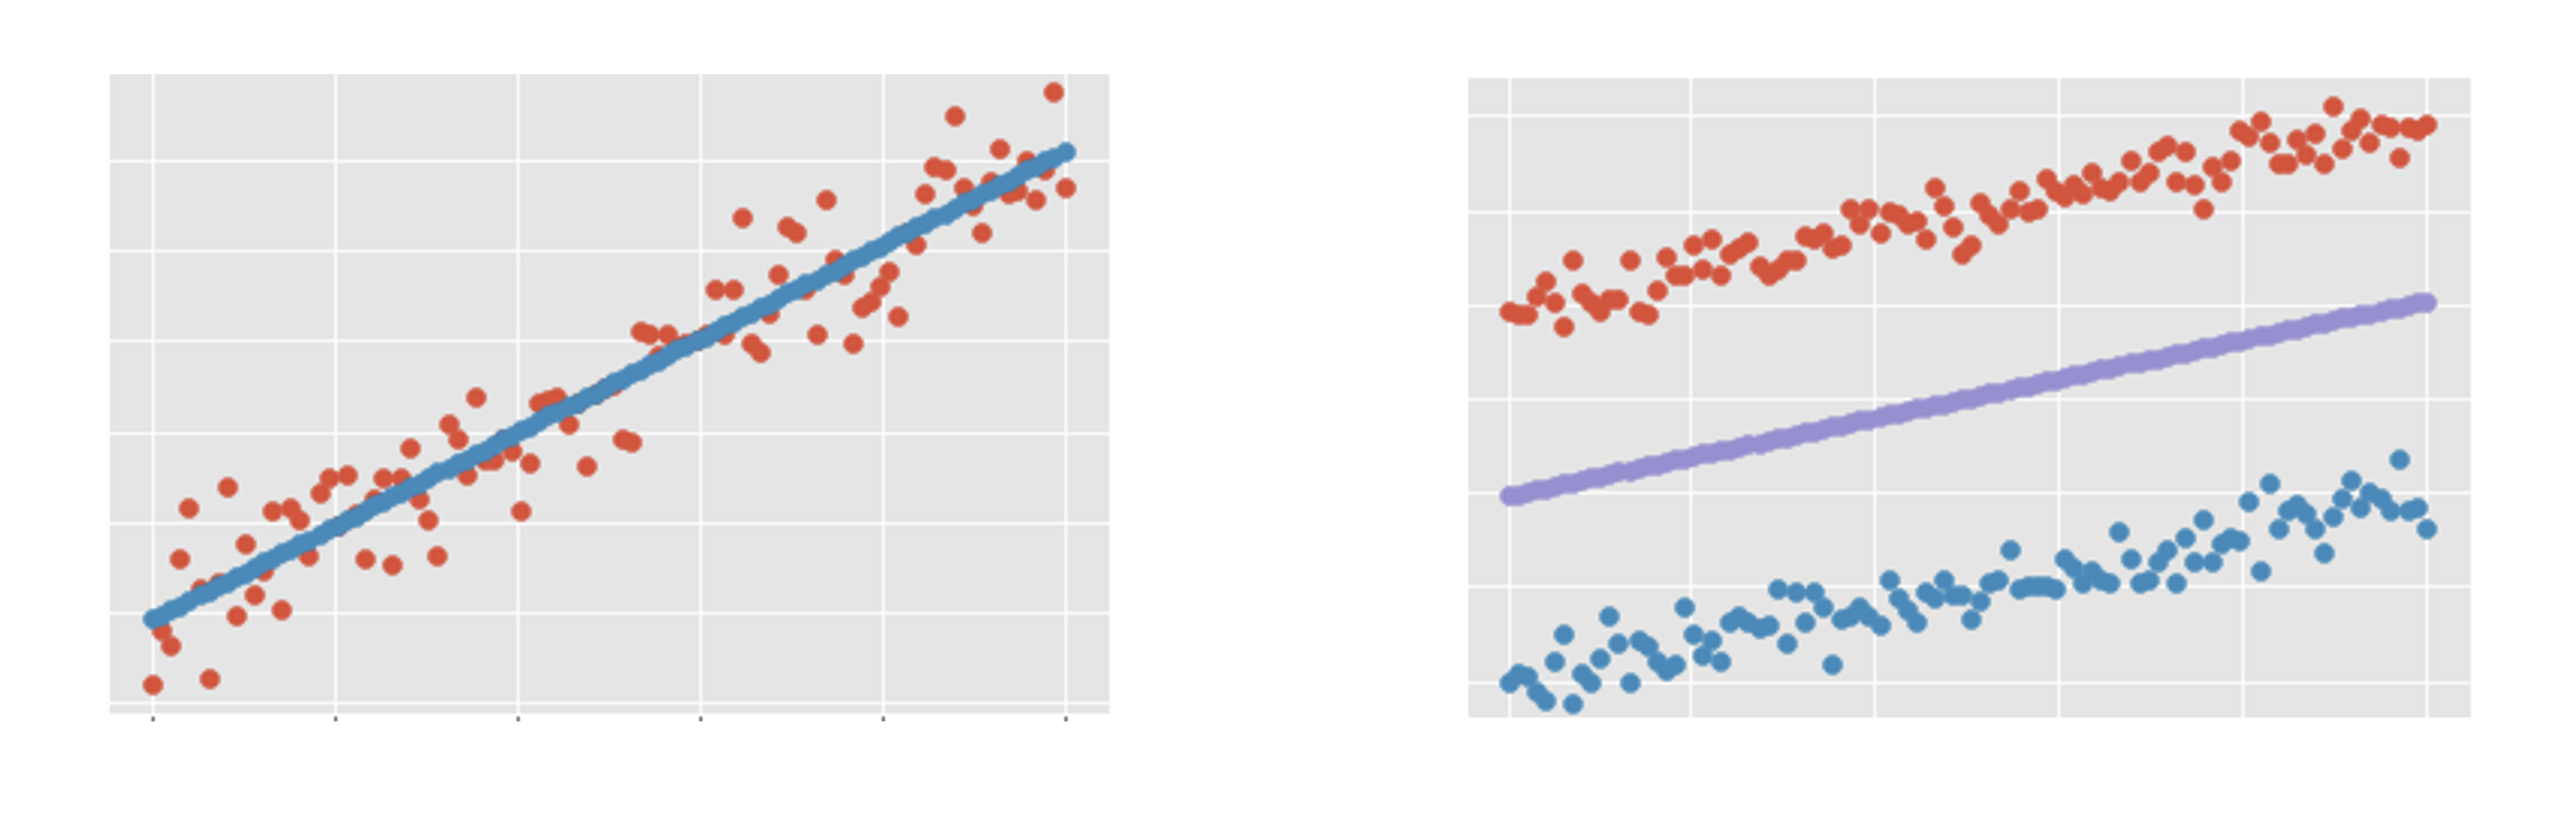

## Линейная регрессия

Восстанавливаемая модель имеет вид
$$ a(x)= w_0 + w_1x_1 + ... + w_nx_n$$

И тогда можно получить прогнозы: 

$$ \hat{y} = \hat{w_0} + \hat{w_1}x_1 + ... + \hat{w_n}x_n$$

Параметры $w_0, w_1, ..., w_n$ не известны.

Но теория говорит, что мы найдем наилучшие оценки параметров, если оптимизирует вот такую функцию:

$$ min{\sum{(y_i - \hat{y_i})^2}} $$

$$ min{\sum{(y_i - \hat{y_i})^2}} = min{\sum{(y_i - w_0 - w_1x_1 - ... - w_nx_n)^2}} $$

Или в матричной нотации:

$$ min(y - Xw)^2 $$


Существует аналитическое решение:

$$ w = (X^TX)^{-1}X^Ty$$

2 неочевидные проблемы:

- Поиск $(X^TX)^{-1}$ имеет кубическую сложность

- $(X^TX)^{-1}$ может быть вырождена или иметь плохую обусловленность

Побеждает все движение - градиентный спуск, но о нем чуть позже

In [ ]:
# Обучаем линейную модель

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df.head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Кратчайшая предобработка данных

In [ ]:
df.dtypes

In [ ]:
var_cat = ['view', 'zipcode', 'condition', 'grade', 'waterfront']
var_real = list(set(df.columns) - set(var_cat))

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df["sqft_above"].fillna(1788.39,inplace=True)

### А отсюда начнется тру-мл

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model_lr = LinearRegression()

model_lr.fit(X_train, y_train)

In [ ]:
y_pred = model_lr.predict(X_test)
print(mae(y_test, y_pred))
print(np.mean(y_test))

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
model = LinearRegression()

mae_val = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(-1*mae_val)
print('Среднее значение ошибки:', np.mean(-1*mae_val))
print('Стандартное отклонение ошибки:', np.std(-1*mae_val))

In [ ]:
coefs = model_lr.coef_

features = list(df.drop('price', axis=1).columns)
df_coef = pd.DataFrame(coefs, features)
df_coef.sort_values(0).plot(kind='bar', figsize=(10,6));

## Регуляризация

<img src='https://server.179.ru/tasks/python/2022b/images/ai/ai18.png'>

<img src='https://server.179.ru/tasks/python/2022b/images/ai/ai17.png'>

Регуляризация - одна из мер в борьбе с переобучением. 

Она добавляет штраф на веса при усложении моделей.

В ходу два типа регуляризации:

- *L1*: $ \alpha \sum{|w_i|}$
- *L2*: $ \alpha \sum{w_i^2}$


Регрессия с L1-регуляризаций, т.е. 
$ min{\sum{(y_i - w_0 - w_1x_1 - ... - w_nx_n)^2} + \alpha \sum{|w_i|}} $  называется Lasso-регрессией


Регрессия с L2-регуляризаций, т.е. 
$ min{\sum{(y_i - w_0 - w_1x_1 - ... - w_nx_n)^2} + \alpha \sum{(w_i)^2}} $  называется Ridge-регрессией


In [ ]:
from sklearn.linear_model import Ridge, Lasso

## Логистическая регрессия

Теория по этому блоку в презентации

In [ ]:
df = pd.read_csv('telecom_churn.csv')


In [ ]:
var_cat = ['State', 'Area code', 'International plan', 'Voice mail plan']

var_real = ['Number vmail messages', 'Total day minutes',
            'Total day calls', 'Total day charge', 'Total eve minutes',
            'Total eve calls', 'Total eve charge', 'Total night minutes',
            'Total night calls', 'Total night charge', 'Total intl minutes',
            'Total intl calls', 'Total intl charge', 
            'Customer service calls', 'Account length']


df[var_cat] = df[var_cat].astype('object')
df = pd.get_dummies(df, drop_first=True)
df.head()

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=df['Churn'])

In [ ]:
model_logreg = LogisticRegression()

model_logreg.fit(X_train, y_train)

In [ ]:
y_pred_proba = model_logreg.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_proba[:, 1]))